<a href="https://colab.research.google.com/github/Pamela-ruiz9/ASR_with_Nemo/blob/main/Actividad2analisisPandas_A01021209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Ingrid Pamela Ruiz Puga
*   MATRÍCULA: A01021209


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)


In [1]:
import pandas as pd
air_df = pd.read_csv('LaqnData.csv')

In [2]:
air_df.shape

(43800, 6)

In [3]:
air_df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [4]:
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [5]:
air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [6]:
air_df.dtypes

,0
Site,object
Species,object
ReadingDateTime,object
Value,float64
Units,object
Provisional or Ratified,object


*   Calcula el porcentaje de valores faltantes por columna.

In [7]:
faltantes = pd.DataFrame({ 'Columna':air_df.columns, '% faltantes': (air_df.isnull().sum().values/air_df.shape[0])*100})
faltantes['% faltantes'] = round(faltantes['% faltantes'], 2).astype(str) + ' %'
faltantes

,Columna,% faltantes
0,Site,0.0 %
1,Species,0.0 %
2,ReadingDateTime,0.0 %
3,Value,7.37 %
4,Units,0.0 %
5,Provisional or Ratified,0.0 %


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?

**Respuesta:** Dadas las intrucciones de la práctica, donde dice *Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire*, necesitariamos conocer si alguna medición se repite para poder conocer el total de las mediciones diferentes. Sin embargo, utilizamos rápidamente el método 'drop_duplicates()' y podemos ver que cada renglón es diferente, por lo que consideraremos que tenemos 43,800 mediciones.

Sin embargo, esta pregunta puede ser ambigua porque tenemos una medición por hora de 5 contaminantes diferentes como lo vimos anteriormente. Por lo tanto, en caso que la medición este definida por el conjunto de registros obtenidos por hora, tendríamos 8760 mediciones.

In [8]:
air_df.drop_duplicates()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R
...,...,...,...,...,...,...
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R


In [9]:
print('Número de fechas por hora diferentes :  ' + str(len(air_df.ReadingDateTime.unique())))

Número de fechas por hora diferentes :  8760


*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?

**Respuesta:** Existen 5 tipos de contaminantes, 'NO', 'NO2', 'NOX', 'PM10', 'PM2.5'

In [10]:
air_df.Species.nunique()

5

In [11]:
air_df.Species.unique()

array(['NO', 'NO2', 'NOX', 'PM10', 'PM2.5'], dtype=object)

*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.

**Respuesta:** Las columnas que no aportan mucho valor informatiivo a los registros son: *Site* y *Provisional or Ratifiedtiene*.

In [12]:
for col in air_df.columns:
  print('La columna ' + col + ' tiene valores únicos ---------> ' + str(air_df[col].nunique()))

La columna Site tiene valores únicos ---------> 1
La columna Species tiene valores únicos ---------> 5
La columna ReadingDateTime tiene valores únicos ---------> 8760
La columna Value tiene valores únicos ---------> 1847
La columna Units tiene valores únicos ---------> 3
La columna Provisional or Ratified tiene valores únicos ---------> 1


*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

**Respuesta:** Los valores se refieren a lo mismo por, lo que procedemos a eliminarla.


In [13]:
air_df.Units.unique()

array(['ug m-3', 'ug m-3 as NO2', 'ug/m3'], dtype=object)

In [14]:
air_df.drop('Units', axis=1, inplace=True)
air_df

,Site,Species,ReadingDateTime,Value,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,R
1,CT3,NO,01/01/2017 01:00,3.6,R
2,CT3,NO,01/01/2017 02:00,2.2,R
3,CT3,NO,01/01/2017 03:00,2.1,R
4,CT3,NO,01/01/2017 04:00,3.3,R
...,...,...,...,...,...
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,R


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

**Respuesta:** Cada contaminante tiene 8,760 lecturas. Al sumar las lecturas de los 5 contaminantes obtenemos 43.800 lecturas.

Sin embargo, la pregunta sigue siendo ambigua, pues se sugiere que la variable del contaminante (Species) define un nivel de granularidad mayor a la tabla y podría definir una medición como un conjunto de 5 lecturas (una por contaminante). Por lo que se obtendrían 8760 mediciones, son las dos respuestas dada la ambiguedad de la pregunta.


In [15]:
air_df.Species.value_counts()

,count
Species,
NO,8760
NO2,8760
NOX,8760
PM10,8760
PM2.5,8760


In [16]:
air_df.Species.value_counts().sum()

43800

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [17]:
air_df.groupby('Species').mean('Value')

,Value
Species,
NO,15.045115
NO2,38.010185
NOX,61.078661
PM10,22.551704
PM2.5,14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [18]:
pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value' )
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


6.	A través de la función `describe()` responde:



In [19]:
describe_pvt = pvt_df.describe()
describe_pvt

Species,NO,NO2,NOX,PM10,PM2.5
count,8660.000000,8660.000000,8660.000000,8657.000000,5933.000000
mean,15.045115,38.010185,61.078661,22.551704,14.999831
std,26.678565,18.580841,54.584805,15.344755,13.558588
min,-2.000000,2.800000,1.000000,-5.600000,-8.000000
25%,3.100000,23.800000,30.300000,13.900000,7.000000
50%,7.100000,35.300000,46.900000,19.500000,11.000000
75%,15.500000,49.900000,73.800000,27.300000,18.000000
max,401.799990,120.200000,734.299990,633.099980,128.000000


*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?

**Respuesta:** Buscaremos el máximo de NO2 ,ediante las estadísticas del método describe() y podremos obtener los registros qye han llegado al máximo. (podrían ser más de 1) Y obtenemos que el 24 de enero del 2017 fue cuando se llegó al máximo.

In [20]:
pvt_df[pvt_df.NO2 == describe_pvt.loc[ 'max','NO2']]

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
24/01/2017 19:00,148.60001,120.2,348.10001,44.4,42.0


*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?

**Respuesta:** Con la misma lógica encontramos los registros que llegaron al minimo de PM10, el cual fue el 12 de septiembre del 2017.


In [21]:
pvt_df[pvt_df.PM10 ==describe_pvt.loc[ 'min','PM10']]

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
12/09/2017 23:00,0.1,7.0,7.1,-5.6,NaN


*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?

**Respuesta:** La mediana de NO es 7.1, ordenando los valores de N0 de menor a mayor,será el valor que esta justo en medio de la lista total de valores de este contaminante ordenada, es decir, el 50% de las mediciones estan por debajo de 7.1 y el otro 50% por encima.

In [22]:
#pvt_df.NO.median() #Comprobación
describe_pvt.loc[ '50%','NO']


7.1


*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

**Respuesta:** El primer cuantil de `PM2.5` es 7, y significa que el 25% de los registros de las mediciones obtuvieron valores menores  o igual a 7.


In [23]:
#pvt_df['PM2.5'].quantile(0.25)
describe_pvt.loc[ '25%','PM2.5']

7.0

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

**Respuesta:** Agrego una matriz de gráficas, donde se puede observar los histogramas de cada contaminate sobre la diagonal, además de un diagrama de dispersión donde se ven las relaciones que tienen los tipos de contaminantes.

Asumiendo que 'variabilidad' se refiere a un número mayor de valores diferentes y con mayor dispersión, el contaminante con mayor variabilidad es el NOX, pues es el histograma que presenta mayor dispersión, además de ser la distribución con la cola más larga y pesada.

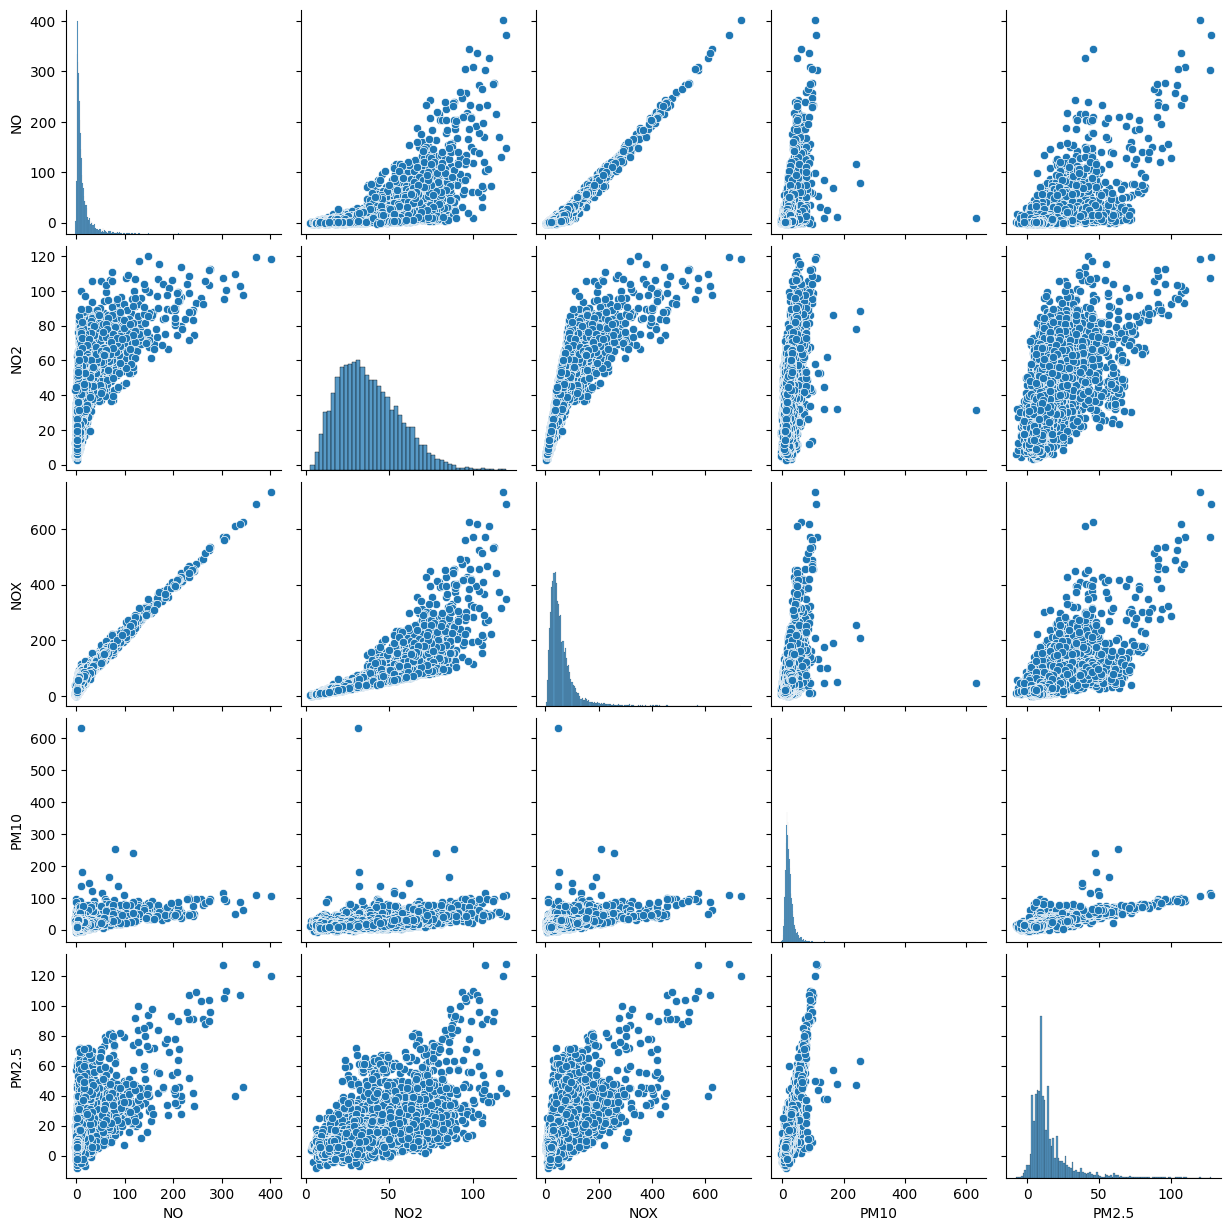

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data=pvt_df)
plt.show()

En el siguiente gráfico se puede observar que la cola de la distribución del contaminante NOX (verde) es más pesada que el resto de las distribuciones.

<Axes: xlabel='Value', ylabel='Density'>

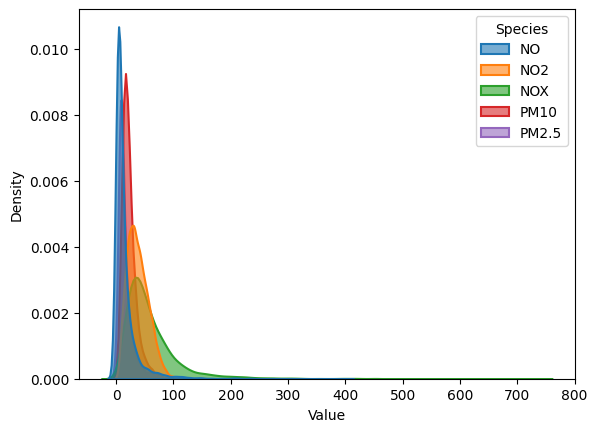

In [25]:
sns.kdeplot(data=air_df, x="Value", hue="Species", fill=True, alpha=0.6, linewidth=1.5)

  Agrego otra gráfica donde he limitado el valor de cada contaminante a 120, solo para poder hacer más legible la comparación de las distribuciones. Sin embargo, recordemos que el máximo de todos los contaminantes esta apor debajo de 734, teniendo colas muy largas.


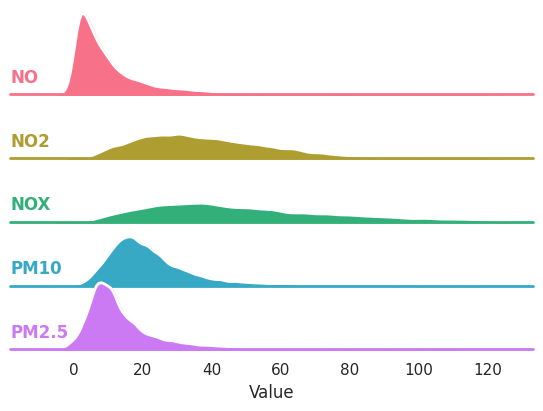

In [26]:
aux = air_df[air_df.Value< 120]
df = pd.DataFrame({'Species': aux.Species, 'Value': aux.Value})
# Configuración de estilo de Seaborn
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Definir una paleta de colores
palette = sns.color_palette("husl", 5)
# Inicialización del gráfico FacetGrid con paleta de colores
g = sns.FacetGrid(df, row="Species", hue="Species", aspect=7, height=.9, palette=palette)
# Dibujar las densidades
g.map(sns.kdeplot, "Value",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Value", clip_on=False, color="w", lw=2, bw_adjust=.5)
# Línea de referencia horizontal
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Función para etiquetar los subgráficos
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "Value")
g.figure.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.show()


8.	Ejecuta el siguiente código y comenta qué hace cada línea:

**Respuesta**

`datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)`

Esta linea toma la columna *ReadingDateTime*, y separa de cada string la fecha de la hora mediante el espacio en blanco ' ', posteriormente pone en otra columna la hora que ya separo. La columna con la fecha y la columna con la hora la asigna en el nuevo dataframe 'datetime_df'.

`datetime_df.columns = ['Date','Time']`

Asigna nuevos nombres a las columnas que acaba de crear, 'Date' y 'Time'

`datetime_df`

Lo intenta mostrar, pero como tiene más salidas en la misma celda, no se muestra.

`date_df = datetime_df.Date.str.split('/',expand=True)`

De manera análoga, toma la columna de la fecha y la separa por el caracter '/' de manera que quedaran los campos del día, mes y año, uno en su propia columna. Lo guarda en un nuevo dataframe 'date_df'.

`date_df.columns = ['Day','Month','Year']`

Vuelve a cambiar el nombre de las columnas (esté metodo de split, asigna numeración a las columnas)

`date_df`

Otro vez se visualiza la tabla con ahora las tres columnas de día, mes y año.

`air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])`

Al dataframe original le 'pega' el dataframe que tiene 3 columnas para el día, mes y año. Además también le peda la hora que habias extraido en el primer 'split()', y borra la columna de año y de la fecha original.

`air_df = air_df.set_index(['Month','Day','Time','Species'])`

Ahora convierte las columnas de mes, día, hora y especie en índice, generando un dataframe de índice multiple.

`air_df`

Lo muestra de nuevo, en versión final.

In [27]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
datetime_df.columns = ['Date','Time']
datetime_df
date_df = datetime_df.Date.str.split('/',expand=True)
date_df.columns = ['Day','Month','Year']
date_df
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df

Site  Value Provisional or Ratified
Month Day Time  Species                                    
01    01  00:00 NO       CT3    3.5                       R
          01:00 NO       CT3    3.6                       R
          02:00 NO       CT3    2.2                       R
          03:00 NO       CT3    2.1                       R
          04:00 NO       CT3    3.3                       R
...                      ...    ...                     ...
12    31  19:00 PM2.5    CT3   -2.0                       R
          20:00 PM2.5    CT3    6.0                       R
          21:00 PM2.5    CT3    5.0                       R
          22:00 PM2.5    CT3    5.0                       R
          23:00 PM2.5    CT3    6.0                       R

[43800 rows x 3 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

**Respuesta:** Los dataframes no son iguales, el último índice de nuestro dataframe (Species) se ha convertido en columna, generando el indice de los 5 contaminantes para cada una de las columnas que tenía nuestro dataframe



In [28]:
air_df.unstack()

Site                      Value                          \
Species           NO  NO2  NOX PM10 PM2.5    NO   NO2   NOX  PM10 PM2.5   
Month Day Time                                                            
01    01  00:00  CT3  CT3  CT3  CT3   CT3   3.5  30.8  36.2  35.7   NaN   
          01:00  CT3  CT3  CT3  CT3   CT3   3.6  31.5  37.0  28.5   NaN   
          02:00  CT3  CT3  CT3  CT3   CT3   2.2  27.3  30.7  22.7   NaN   
          03:00  CT3  CT3  CT3  CT3   CT3   2.1  23.5  26.8  20.5   NaN   
          04:00  CT3  CT3  CT3  CT3   CT3   3.3  28.0  33.0  22.1   NaN   
...              ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   
12    31  19:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.5  16.3  -2.0   
          20:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.6  14.5   6.0   
          21:00  CT3  CT3  CT3  CT3   CT3   0.7  14.1  15.1   8.6   5.0   
          22:00  CT3  CT3  CT3  CT3   CT3   1.1  22.0  23.6  12.5   5.0   
          23:00  CT3  CT3  CT3  CT3   CT3   0.9  19.4  20.7  10.4   6.0   

                Provisional or Ratified                     
Species                              NO NO2 NOX PM10 PM2.5  
Month Day Time                                              
01    01  00:00                       R   R   R    R     R  
          01:00                       R   R   R    R     R  
          02:00                       R   R   R    R     R  
          03:00                       R   R   R    R     R  
          04:00                       R   R   R    R     R  
...                                 ...  ..  ..  ...   ...  
12    31  19:00                       R   R   R    R     R  
          20:00                       R   R   R    R     R  
          21:00                       R   R   R    R     R  
          22:00                       R   R   R    R     R  
          23:00                       R   R   R    R     R  

[8760 rows x 15 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

**Respuesta:** Las *diferencias* entre el par `melt()/pivot()` y el par `stack()/unstack()` son las siguientes:
-  `melt()/pivot()` generan un dataframe de índice sensillo de manera que la manipulación para agregar los datos será por columnas-valores.
-  `stack()/unstack()` generan un dataframe de multi-indice manipulando niveles de índice y niveles de columnas.

Las *similitudes* son las siguientes:
- Ambos pares se utilizan para agregar y desagregar datos bajo diferentes niveles.
- `melt()` desagrega los datos generando tablas largas, tal como lo realiza `stack()` a nivel índice.
- `pivot()` agrega los datos generando columnas por cada valor diferente de una columna designada, de la misma manera que `unstack()` a nivel índice.

Por lo que una contraparte para `melt()` sería `unstack()` si el objetivo es es encontrar el método con funcionalidad inversa, entonces `melt()` transforma a tablas largas y `unstack()` transforma tablas anchas.

 Si por el contrario nos referimos a cuál método dentro del par contrario es simil a `melt()` sería `stack()`, pues amobos métodos tranforman a tabla larga.